In [138]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.activations import relu,sigmoid,linear
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.preprocessing import LabelEncoder

In [139]:
data = pd.read_csv("/content/drive/MyDrive/archive (1)/english.csv")

Without Label encoder



```
# for j in range(0,len(data['label'])):
  for i in range(65,91):
    if (ascii(data['label'][j]))==('\''+chr(i)+'\''):
      data['label'][j]=i-55
for j in range(0,len(data['label'])):
  for i in range(97,123):
    if (ascii(data['label'][j]))==('\''+chr(i)+'\''):
      data['label'][j]=i-60
```








In [140]:
data['label'][677]

'C'

In [145]:
x = np.array(data['image'])

In [143]:
x

array(['Img/img001-001.png', 'Img/img001-002.png', 'Img/img001-003.png',
       ..., 'Img/img062-053.png', 'Img/img062-054.png',
       'Img/img062-055.png'], dtype=object)

In [146]:
y = data['label']
le = LabelEncoder()
y = le.fit_transform(y)

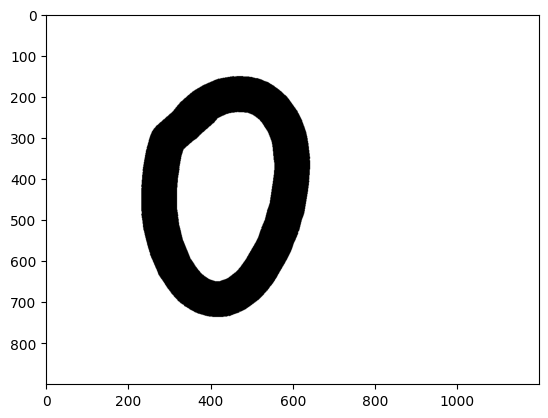

In [148]:
img = mpimg.imread('/content/drive/MyDrive/archive (1)/'+x[0])
imgplot = plt.imshow(img)
plt.show()


In [149]:
x_modified = []

for i in data['image']:
  img = Image.open('/content/drive/MyDrive/archive (1)/'+i)
  img = img.resize((64,64))
  img = img.convert('RGB')
  img = np.array(img)
  x_modified.append(img)


In [150]:
x_modified = np.array(x_modified)

In [151]:
x_scaled = x_modified/255
x_scaled.shape

(3410, 64, 64, 3)

In [158]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20)
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

In [159]:
model = Sequential()
model.add(Conv2D(512,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(1024,activation='relu'))

model.add(Dense(512,activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(62,activation='softmax'))

In [154]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 60, 60, 512)       38912     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 30, 30, 512)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 256)       1179904   
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 256)       590080    
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 256)       

In [160]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['acc']
)

In [161]:
history = model.fit(x_train,y_train,validation_split = 0.1,epochs = 20)

Epoch 1/20
77/77 [==============================] - 6s 44ms/step - loss: 4.1312 - acc: 0.0155 - val_loss: 4.1279 - val_acc: 0.0110
Epoch 2/20
77/77 [==============================] - 3s 42ms/step - loss: 4.1270 - acc: 0.0191 - val_loss: 4.1107 - val_acc: 0.0110
Epoch 3/20
77/77 [==============================] - 3s 41ms/step - loss: 3.7163 - acc: 0.0733 - val_loss: 3.0870 - val_acc: 0.1282
Epoch 4/20
77/77 [==============================] - 3s 40ms/step - loss: 2.6062 - acc: 0.2464 - val_loss: 2.1977 - val_acc: 0.3407
Epoch 5/20
77/77 [==============================] - 3s 41ms/step - loss: 1.7314 - acc: 0.4627 - val_loss: 1.4252 - val_acc: 0.5385
Epoch 6/20
77/77 [==============================] - 3s 41ms/step - loss: 1.1256 - acc: 0.6232 - val_loss: 1.4228 - val_acc: 0.5568
Epoch 7/20
77/77 [==============================] - 3s 42ms/step - loss: 0.7163 - acc: 0.7580 - val_loss: 1.2391 - val_acc: 0.6117
Epoch 8/20
77/77 [==============================] - 3s 41ms/step - loss: 0.4930 - a

In [162]:
loss,accuracy = model.evaluate(x_test,y_test)
print("Test Accuracy: {}".format(accuracy))

22/22 [==============================] - 0s 15ms/step - loss: 1.3393 - acc: 0.7507
Test Accuracy: 0.7507331371307373


[]

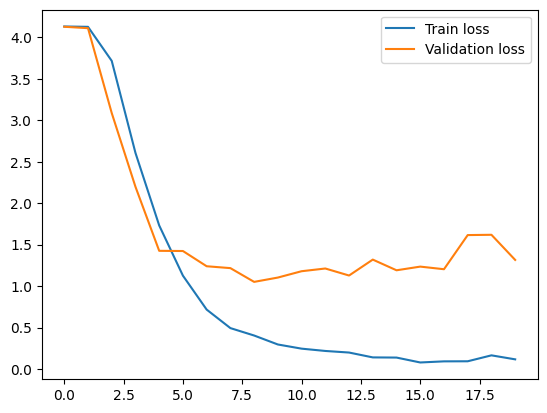

In [163]:
h = history
plt.plot(h.history['loss'],label = 'Train loss')
plt.plot(h.history['val_loss'],label = 'Validation loss')
plt.legend()
plt.plot()

[]

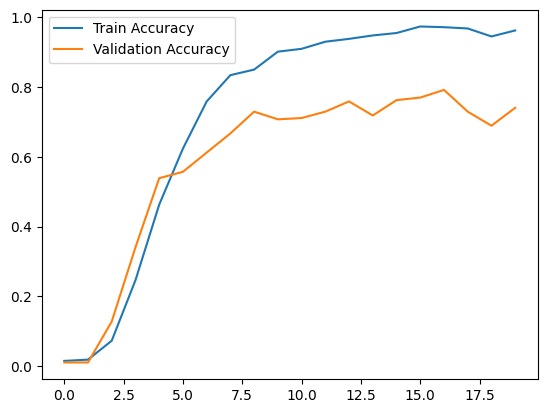

In [164]:
plt.plot(h.history['acc'],label = 'Train Accuracy')
plt.plot(h.history['val_acc'],label = 'Validation Accuracy')
plt.legend()
plt.plot()

In [165]:
predicted_labels = le.inverse_transform(model.predict(x_test).argmax(axis=1))
actual_labels = le.inverse_transform(y_test)

22/22 [==============================] - 0s 13ms/step


In [167]:
print('predicted label is ;',predicted_labels[56])
print('Actual Label is :',actual_labels[56])

predicted label is ; A
Actual Label is : A


Enter the image path : /content/drive/MyDrive/archive (1)/Img/img018-015.png


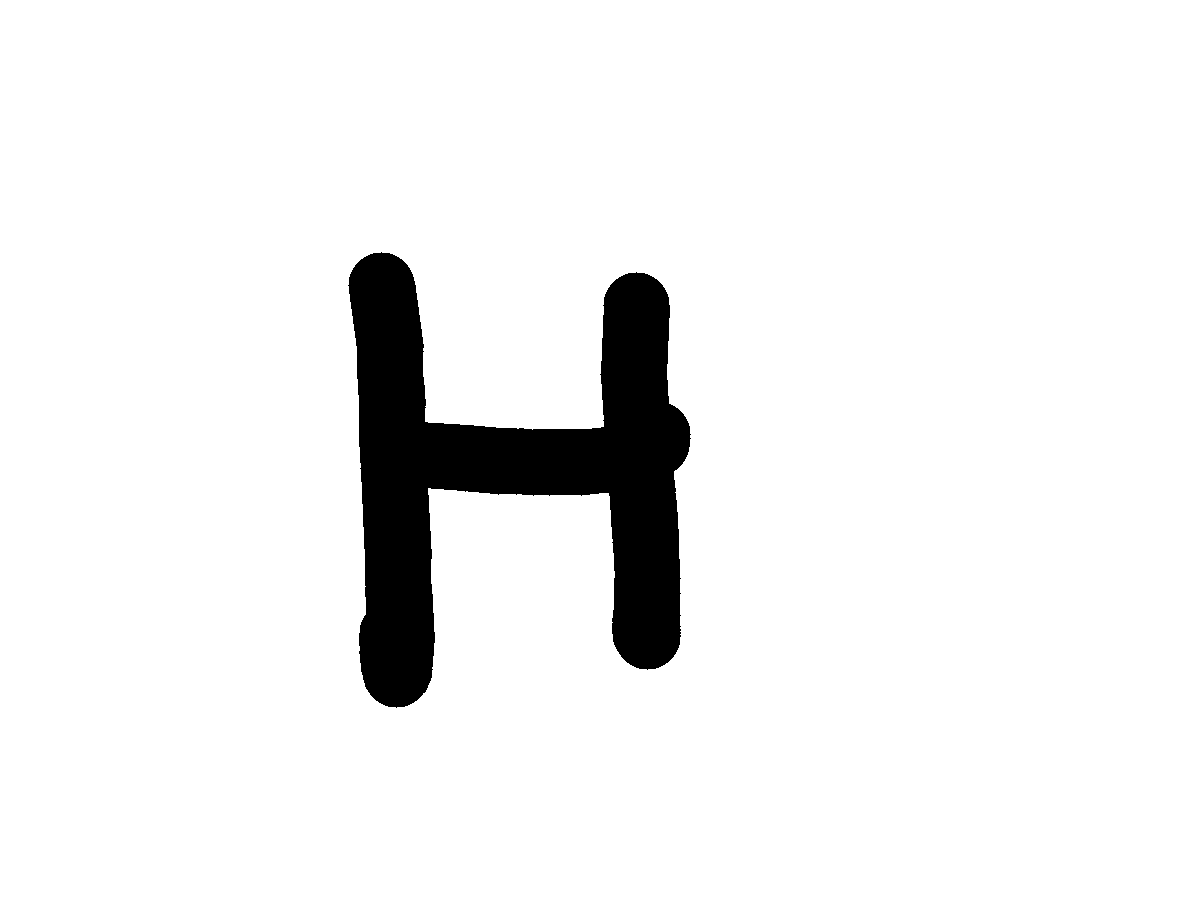

In [168]:
img_path = input("Enter the image path : ")
inp_img = cv2.imread(img_path)
cv2_imshow(inp_img)

In [169]:
img = Image.open(img_path)
img = img.resize((64,64))
img = img.convert('RGB')
img = np.array(img)

#inp_img = cv2.resize(inp_img,(64,64))
inp_img = img / 255
print(inp_img.shape)
inp_img = np.reshape(inp_img,[1,64,64,3])

(64, 64, 3)


In [170]:
predicted_label = le.inverse_transform(model.predict(inp_img).argmax(axis=1))
print('predicted label is ;',predicted_label)

1/1 [==============================] - 0s 231ms/step
predicted label is ; ['H']


In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

22/22 [==============================] - 0s 15ms/step
Accuracy: 0.750733137829912
Precision: 0.7828422003264596
Recall: 0.750733137829912
F1 Score: 0.7529039713021864
Confusion Matrix:
[[ 5  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0  5 ...  1  0  1]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  1]]
